# Week 2 - Corpus Linguistics

This week, we take text corpora that we have developed, spidered, scraped, and encoded, and we find and count words and simple phrases and properties of those counts (e.g., word frequency distributions). Initially, we model how to search corpora for keywords or phrases. Next, we examine the distributions of terms and phrases across a corpus, and the corelation between different words and phrase counts. In order to do this effectively, we coarsely disambiguate words based of part-of-speech (POS) tagging, and normalize them through stemming and lemmatization. Next we distinguish *important* words and phrase within the corpus, and image them with Wordls! Then we calculate word frequenceis, conditional frequences (the frequency of word *shock* conditional on the presence of word *awe*), and statistically significant collocations of lengths 2 through $n$. Finally, we calculate and visualize Differences (Divergences and Distances) between the word frequency distributions from two corpora. 

For this notebook we will be using the following packages

In [218]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

# Retrieving exemplary corpora

To get started we will need some examples. Let's start by downloading one of the corpuses from `nltk`, a Natural Language Toolkit developed by computational linguists at the University of Pennsylvania. Let's take a look at how that works.

First we can get a list of works available from the Gutenburg corpus, with the [corpus module](http://www.nltk.org/api/nltk.corpus.html). To do this we will need to tell nltk where the data are, and download them if need be.

In [5]:
#You should have them already downloaded in the data directory
try:
    #adding path for both local and server, only one of these will actually be used at a time
    nltk.data.path.append('/project2/macs60000/shared_data/nltk')
    nltk.data.path.append('../data')
    #Check that everything is in place
    nltk.corpus.gutenberg.fileids()
except LookupError:
    print("You have to download all the documents")
    print("Downloading to ../data this should only take a couple minutes")
    nltk.download('all', download_dir = '../data')
    nltk.data.path.append('../data')
#If you haven't downloaded the copura then you will have to run `nltk.download()`
print(nltk.corpus.gutenberg.fileids())
print(len(nltk.corpus.gutenberg.fileids()))

You have to download all the documents
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to ../data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to ../data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to ../data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to ../data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to ../data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to ../data...
[nltk_data]    |   Unzipping corpora\cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to ../data...
[nltk_data]    |   Unzipping corpora\cess_esp.zip.
[nltk_data]    | Downloading package chat80 to ../data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downl

[nltk_data]    | Downloading package webtext to ../data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wordnet to ../data...
[nltk_data]    |   Unzipping corpora\wordnet.zip.
[nltk_data]    | Downloading package wordnet_ic to ../data...
[nltk_data]    |   Unzipping corpora\wordnet_ic.zip.
[nltk_data]    | Downloading package words to ../data...
[nltk_data]    |   Unzipping corpora\words.zip.
[nltk_data]    | Downloading package ycoe to ../data...
[nltk_data]    |   Unzipping corpora\ycoe.zip.
[nltk_data]    | Downloading package rslp to ../data...
[nltk_data]    |   Unzipping stemmers\rslp.zip.
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     ../data...
[nltk_data]    |   Unzipping taggers\maxent_treebank_pos_tagger.zip.
[nltk_data]    | Downloading package universal_tagset to ../data...
[nltk_data]    |   Unzipping taggers\universal_tagset.zip.
[nltk_data]    | Downloading package maxent_ne_chunker to ..

We can also look at the individual works

In [6]:
nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')[2000:4000]

"es,\nBut the Norweyan Lord, surueying vantage,\nWith furbusht Armes, and new supplyes of men,\nBegan a fresh assault\n\n   King. Dismay'd not this our Captaines, Macbeth and\nBanquoh?\n  Cap. Yes, as Sparrowes, Eagles;\nOr the Hare, the Lyon:\nIf I say sooth, I must report they were\nAs Cannons ouer-charg'd with double Cracks,\nSo they doubly redoubled stroakes vpon the Foe:\nExcept they meant to bathe in reeking Wounds,\nOr memorize another Golgotha,\nI cannot tell: but I am faint,\nMy Gashes cry for helpe\n\n   King. So well thy words become thee, as thy wounds,\nThey smack of Honor both: Goe get him Surgeons.\nEnter Rosse and Angus.\n\nWho comes here?\n  Mal. The worthy Thane of Rosse\n\n   Lenox. What a haste lookes through his eyes?\nSo should he looke, that seemes to speake things strange\n\n   Rosse. God saue the King\n\n   King. Whence cam'st thou, worthy Thane?\n  Rosse. From Fiffe, great King,\nWhere the Norweyan Banners flowt the Skie,\nAnd fanne our people cold.\nNorway hi

All the listed works have been nicely marked up and classified for us so we can do much better than just looking at raw text.

In [7]:
print(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
print(nltk.corpus.gutenberg.sents('shakespeare-macbeth.txt'))

['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...]
[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]


# Counting words

If we want to do some analysis we can start by simply counting the number of times each word occurs within the corpus.

In [8]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
countedWords[:10]

,count,word
0,4,[
1,650,the
2,2,tragedie
3,338,of
4,62,macbeth
5,49,by
6,1,william
7,1,shakespeare
8,1,1603
9,4,]


Notice how `wordCounter()` is not a very complicated function. That is because the hard parts have already been done by `nltk`. If we were using unprocessed text we would have to tokenize and determine what to do with the non-word characters.

nltk also offers a built-in way for getting a frequency distribution from a list of words:

In [9]:
words = [word.lower() for word in nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')]
freq = nltk.FreqDist(words)
print (freq['macbeth'])

62


Lets sort and plot our counts to investigate the shape of our word frequency distribution.

First we need to sort the words by count.

In [10]:
#Doing this in place (changing the original DataFrame) as we don't need the unsorted DataFrame
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

,count,word
29,1962,","
12,1235,.
1,650,the
36,637,'
16,546,and
64,477,:
54,384,to
56,348,i
3,338,of
27,241,?


Punctuation and very common words (articles 'a' and 'the'; prepositions 'of' and 'to') make up the most common values, but this isn't very interesting and can actually get in the way of our analysis. We may remove these 'function words' by removing according to a stopword list, setting some frequency threshold, or using a weighting scheme (like tf.idf) to decrease their influence (all modeled later in this tutorial).

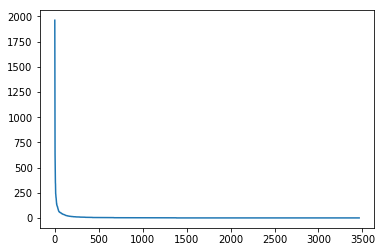

In [11]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

This shows that likelihood of a word occurring is inversely proportional to its rank. This effect is called [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law), and suggests that the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency) resulting in a linear relationship.

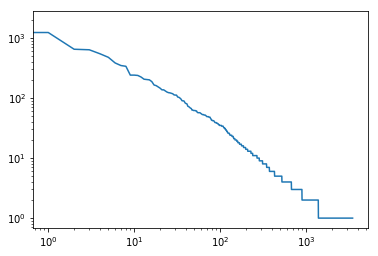

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

(The same relationship occurs in many other rankings, such as population ranks of cities, corporation sizes, income rankings, etc.) 

The distribution was imagined by Zipf to be driven by a principle of 'least effort' where speakers did not work any harder than necessary to communicate a given idea, but the basis for this relationship is still not well understood and conforms at least as well to a process of [preferential attachment](https://en.wikipedia.org/wiki/Preferential_attachment) whereby people disproportionately attend to popular words.

There are many other properties of words we can examine. First lets look surrounding words with the concordance. To do this we need to load the text into a `ConcordanceIndex`

In [13]:
macbethIndex = nltk.text.ConcordanceIndex(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))

Then we can retrieve all the words that cooccur with a word in a given word window. Let's first look at `'macbeth'`.

In [14]:
macbethIndex.print_concordance('macbeth')

No matches


Weird?! `'macbeth'` doesn't occur anywhere in the the text. What happened?

`ConcordanceIndex` is case sensitive, lets try looking for `'Macbeth'`

In [15]:
macbethIndex.print_concordance('Macbeth')

Displaying 25 of 61 matches:
                                  Macbeth by William Shakespeare 1603 ] Act
 the Heath 3 . There to meet with Macbeth 1 . I come , Gray - Malkin All . 
but all ' s too weake : For braue Macbeth ( well hee deserues that Name ) D
smay ' d not this our Captaines , Macbeth and Banquoh ? Cap . Yes , as Spar
, And with his former Title greet Macbeth Rosse . Ile see it done King . Wh
 King . What he hath lost , Noble Macbeth hath wonne . Exeunt . Scena Terti
ithin . 3 . A Drumme , a Drumme : Macbeth doth come All . The weyward Siste
, the Charme ' s wound vp . Enter Macbeth and Banquo . Macb . So foule and 
an : what are you ? 1 . All haile Macbeth , haile to thee Thane of Glamis 2
hee Thane of Glamis 2 . All haile Macbeth , haile to thee Thane of Cawdor 3
hee Thane of Cawdor 3 . All haile Macbeth , that shalt be King hereafter Ba
. Hayle 3 . Hayle 1 . Lesser than Macbeth , and greater 2 . Not so happy , 
hough thou be none : So all haile Macbeth , and Banquo 1 . 

That's better. What about something a lot less frequent?

In [16]:
print(countedWords[countedWords['word'] == 'donalbaine'])
macbethIndex.print_concordance('Donalbaine')

    count        word
80      7  donalbaine
Displaying 7 of 7 matches:
m within . Enter King Malcome , Donalbaine , Lenox , with attendants , mee
Enter King , Lenox , Malcolme , Donalbaine , and Attendants . King . Is ex
rches . Enter King , Malcolme , Donalbaine , Banquo , Lenox , Macduff , Ro
 ' th ' second Chamber ? Lady . Donalbaine Mac . This is a sorry sight Lad
er , and Treason , Banquo , and Donalbaine : Malcolme awake , Shake off th
to brag of . Enter Malcolme and Donalbaine . Donal . What is amisse ? Macb
were subborned , Malcolme , and Donalbaine the Kings two Sonnes Are stolne


# Getting and working with raw text

First, we will retrieve a collection of press releases from a *GitHub API* that archived them, based on a number of analyses by Justin Grimmer, a political scientist whose work we will read next week, and who will be joining the University of Chicago next July!

GitHub API requests are made to `'https://api.github.com/'` and responses are in JSON, similar to Tumblr's API.

We will get the information on [github.com/lintool/GrimmerSenatePressReleases](https://github.com/lintool/GrimmerSenatePressReleases) as it contains a nice set documents.

In [17]:
r = requests.get('https://api.github.com/repos/lintool/GrimmerSenatePressReleases')
senateReleasesData = json.loads(r.text)
print(senateReleasesData.keys())
print(senateReleasesData['description'])

dict_keys(['id', 'name', 'full_name', 'owner', 'private', 'html_url', 'description', 'fork', 'url', 'forks_url', 'keys_url', 'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url', 'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url', 'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url', 'languages_url', 'stargazers_url', 'contributors_url', 'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url', 'comments_url', 'issue_comment_url', 'contents_url', 'compare_url', 'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url', 'milestones_url', 'notifications_url', 'labels_url', 'releases_url', 'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url', 'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size', 'stargazers_count', 'watchers_count', 'language', 'has_issues', 'has_projects', 'has_downloads', 'has_wiki', 'has_pages', 'forks_count', 'mirror_url', 'archived', 'open_issues_count', 'license', 'forks', 'open_i

What we are interested in here is the `'contents_url'`

In [18]:
print(senateReleasesData['contents_url'])

https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/{+path}


We can use this to get any or all of the files from the repo.

In [19]:
r = requests.get('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse')
whitehouseLinks = json.loads(r.text)
whitehouseLinks[0]

{'_links': {'git': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/git/blobs/f524289ee563dca58690c8d36c23dce5dbd9962a',
  'html': 'https://github.com/lintool/GrimmerSenatePressReleases/blob/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
  'self': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse/10Apr2007Whitehouse123.txt?ref=master'},
 'download_url': 'https://raw.githubusercontent.com/lintool/GrimmerSenatePressReleases/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'git_url': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/git/blobs/f524289ee563dca58690c8d36c23dce5dbd9962a',
 'html_url': 'https://github.com/lintool/GrimmerSenatePressReleases/blob/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'name': '10Apr2007Whitehouse123.txt',
 'path': 'raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'sha': 'f524289ee563dca58690c8d36c23dce5dbd9962a',
 'size': 2206,
 'type': 'file',
 'url': 'https://api.github.com/r

Now we have a list of information about Whitehouse press releases. Let's look at one of them.

In [20]:
r = requests.get(whitehouseLinks[0]['download_url'])
whitehouseRelease = r.text
print(whitehouseRelease[:1000])
len(whitehouseRelease)

SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY IN PUSH FOR STEM CELL RESEARCH
  Sharing the story of Lila Barber, a 12 year old girl from Westerly, Sen. Sheldon Whitehouse (D-R.I.) on Tuesday, April 10, 2007, illustrated the hope stem cell research can offer in a speech on the Senate floor in favor of legislation to expand federal funding for stem cell research.  
   Whitehouse met Lila two weeks ago. She was diagnosed two years ago with osteosarcoma, a cancerous bone condition, and last year underwent cadaver bone transplant surgery. The procedure saved her leg and is helping her remain cancer-free, but the transplanted tissue will not grow with her and likely will break down over time. Stem cell research, Whitehouse explained, could vastly improve the care of patients like Lila by allowing surgeons to enhance transplants with a patient's own stem cells, which could replace the lost bone and cartilage, or grow entirely new replacement bones and joints. 
   "Stem cell research gives hope

2206

Now we have a string of correctly encoded text, similar to those we constructed from last week's assignment. For analysis of its words, next we need to tokenize it, or to split it into a sequence of tokens or word instances.

In [21]:
whTokens = nltk.word_tokenize(whitehouseRelease)
whTokens[10:30]

['STEM',
 'CELL',
 'RESEARCH',
 'Sharing',
 'the',
 'story',
 'of',
 'Lila',
 'Barber',
 ',',
 'a',
 '12',
 'year',
 'old',
 'girl',
 'from',
 'Westerly',
 ',',
 'Sen.',
 'Sheldon']

`whTokens` is a list of 'words' constructed from nltk's `word_tokenize` method built on the [Penn Treebank tokenizer](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.treebank). While it's better than `.split(' ')`, a general python string method that splits on whitespace, it is not perfect. There are many different ways to tokenize a string. `word_tokenize` is unfortunately unaware of sentences and is essentially a complicated regular expression (regex) run across the string.

If we want to find sentences we can use something like `nltk.sent_tokenize()`, which implements the [Punkt Sentence tokenizer](http://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.punkt.PunktSentenceTokenizer), a machine learning based algorithm that works well for many European languages.

We could also use the [Stanford tokenizer](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.stanford) or construct our own regex with [`RegexpTokenizer()`](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.regexp). Picking the correct tokenizer is important as the tokens form the base of our analysis.

For our purposes in this example, the Penn Treebank tokenizer is fine.

To use the list of tokens in `nltk`, and take advantage of functions like `concordance`, shown above, we can convert it into a `Text`.

In [22]:
whText = nltk.Text(whTokens)

whitehouseIndex = nltk.text.ConcordanceIndex(whText) 
whitehouseIndex.print_concordance('Whitehouse')

Displaying 5 of 5 matches:
rl from Westerly , Sen. Sheldon Whitehouse ( D-R.I. ) on Tuesday , April 1
unding for stem cell research . Whitehouse met Lila two weeks ago . She wa
ver time . Stem cell research , Whitehouse explained , could vastly improv
ch might help or even cure , '' Whitehouse said . Whitehouse also praised 
ven cure , '' Whitehouse said . Whitehouse also praised the efforts of Rho


*Note* that the `Text` class is for doing rapid, exploratory analysis. It provides an easy interface to many of the operations we want to do, but it does not allow us much control over the particular operations it glosses. When you are doing a more complete analysis, you should be using the module specifically designed for that task instead of the shortcut method `Text` provides, e.g. use  [`collocations` Module](http://www.nltk.org/api/nltk.html#module-nltk.collocations) instead of `.collocations()`.

Now that we have gotten this loaded, let's glance at few features we will delve into more deeply later.

For example, we can find words that statistically tend to occur together and typically have a composite, idiomatic meaning irreducible to the semantics of its component words. We will do this later with more control over exactly how these are identified.

In [23]:
whText.collocations()

Rhode Island; stem cells; cell research; Cell Enhancement; Enhancement
Act; President Bush; Stem Cell; stem cell; Stem cell


Or we can pick a word (or words) and find what words tend to occur around it.

In [24]:
whText.common_contexts(['stem'])

for_cell hope_cell ._cell own_cells ``_cell of_cell on_cells the_cell
embryonic_cells


We can also just count the number of times the word occurs.

In [25]:
whText.count('cell')

5


We can also plot each time a set of words occurs.

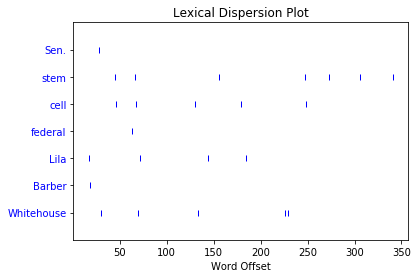

In [26]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['Sen.','stem', 'cell', 'federal' ,'Lila', 'Barber', 'Whitehouse'])
sns.set() #Re-enabling seaborn

If we want to do an analysis of all the Whitehouse press releases we will first need to obtain them. By looking at the API we can see the the URL we want is [https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse](https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse), so we can create a function to scrape the individual files.

If you want to know more about downloading from APIs, refer back to the 1st notebook.

In [27]:
def getGithubFiles(target, maxFiles = 100):
    #We are setting a max so our examples don't take too long to run
    #For converting to a DataFrame
    releasesDict = {
        'name' : [], #The name of the file
        'text' : [], #The text of the file, watch out for binary files
        'path' : [], #The path in the git repo to the file
        'html_url' : [], #The url to see the file on Github
        'download_url' : [], #The url to download the file
    }

    #Get the directory information from Github
    r = requests.get(target)
    filesLst = json.loads(r.text)

    for fileDict in filesLst[:maxFiles]:
        #These are provided by the directory
        releasesDict['name'].append(fileDict['name'])
        releasesDict['path'].append(fileDict['path'])
        releasesDict['html_url'].append(fileDict['html_url'])
        releasesDict['download_url'].append(fileDict['download_url'])

        #We need to download the text though
        text = requests.get(fileDict['download_url']).text
        releasesDict['text'].append(text)

    return pandas.DataFrame(releasesDict)

whReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse', maxFiles = 10)
whReleases[:5]

,download_url,html_url,name,path,text
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Whitehouse123.txt,raw/Whitehouse/10Apr2007Whitehouse123.txt,SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY I...
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Whitehouse2.txt,raw/Whitehouse/10Apr2008Whitehouse2.txt,SEN. WHITEHOUSE SAYS PRESIDENT BUSH MUST BEGIN...
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Whitehouse3.txt,raw/Whitehouse/10Apr2008Whitehouse3.txt,EPA MUST REVIEW LEGAL PROCESS TO ROOT OUT POLI...
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2007Whitehouse78.txt,raw/Whitehouse/10Aug2007Whitehouse78.txt,R.I. SENATORS PRAISE SEN. DENIAL OF LNG FACILI...
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Jan2008Whitehouse35.txt,raw/Whitehouse/10Jan2008Whitehouse35.txt,SEN. WHITEHOUSE COMMENTS ON ONE-YEAR ANNIVERSA...


If you are having trouble downloading the data uncomment this next cell

In [28]:
#whReleases = pandas.read_csv('../data/whReleases.csv')

Now we have all the texts in a DataFrame we can look at a few things.

First let's tokenize the texts with the same tokenizer as we used before. We will just save the tokens as a list for now; no need to convert to `Text`s.

In [29]:
whReleases['tokenized_text'] = whReleases['text'].apply(lambda x: nltk.word_tokenize(x))

Now lets see how long each of the press releases is:

In [30]:
whReleases['word_counts'] = whReleases['tokenized_text'].apply(lambda x: len(x))
whReleases['word_counts']

0    397
1    344
2    553
3    216
4    257
5    380
6    270
7    521
8    484
9    482
Name: word_counts, dtype: int64

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [57]:
directory = 'C:\\Users\\Andrew\\content-analysis-2018\\2-Corpus-Linguistics'

## For my work, I need to study annual shareholder letters to understand how they change over time. I'll likely be continuing on this project for the seminar. The following three letters are from the JPMorgan Chase CEO to his shareholders in the years 2005, 2010, and 2016

In [58]:
file2005 = directory + '\\JPMorgan Chase 2005.txt'
file2010 = directory + '\\JP Morgan and Chase Letter 2010.txt'
file2016 = directory + '\\JPMorgan Chase 2016.txt'

In [59]:
chase2005 = open(file2005,'r', encoding = 'utf-8').read()
chase2010 = open(file2010,'r', encoding = 'utf-8').read()
chase2016 = open(file2016,'r', encoding = 'utf-8').read()
print(chase2005[3000:4000])

rspective and balance, and only with that balance and
perspective can you find true north.You learn how important your family and friends are in
enabling you to maintain the passion and commitment to
be the CEOof a firm like JPMorgan Chase and how privi-leged youÕve been to have been the leader.Thus, while my JPMorgan Chase career is nearing an end, a
new chapter in our companyÕs long history is beginning. It is

time to pass the baton to a new group of leaders, led by
Jamie Dimon, who will take this firm to the next level of
performance, harvesting its vast potential and maximizing
shareholder value through great execution.Letter from William B.Harrison,Jr,
ChairmanDear fellow shareholder, 
ALet me close with a profound thanks to our shareholderswho have had the faith to believe in the potential of this
firm. Thanks to our outstanding Board of Directors for
their support and wisdom, and I want to express my 
special gratitude to retiring directors Larry Bossidy and
Hans Becherer whose

Tokenize the texts

In [60]:
tokens2005 = nltk.word_tokenize(chase2005)
tokens2010 = nltk.word_tokenize(chase2010)
tokens2016 = nltk.word_tokenize(chase2016)

make use of the Text class for a quick study

In [61]:
Text2005 = nltk.Text(tokens2005)
Text2010 = nltk.Text(tokens2010)
Text2016 = nltk.Text(tokens2016)
Chase2010Index = nltk.text.ConcordanceIndex(Text2010) 
#note: while I am interested in looking how CEOs talk about environmental policies, the following illustrates that 'environment'
# not only discusses climate change, etc. BUT also the business environment
Chase2010Index.print_concordance('environment')

Displaying 5 of 5 matches:
r business : i. the post-crisis environment : how we view the signi˜cant ch
ation , our energy policy , the environment , our education and health syst
ble energy policy ; protect our environment ; improve our education and hea
ole of banks change in this new environment ? banks serve a critical functi
 % throughout a highly stressed environment . the new basel iii requirement


count the number of times 'shareholder' is said in the 2005 letter

In [62]:
words = [word.lower() for word in tokens2005]
freq = nltk.FreqDist(words)
print (freq['shareholder'])

5


Understanding common collocations and how the word 'shareholder' is used.

In [71]:
Text2005.collocations()
print('********')
Text2010.collocations()
print('********')
Text2016.collocations()
print('********')
Text2005.common_contexts(['shareholders'])
Text2005.common_contexts(['shareholder'])
print('********')
Text2010.common_contexts(['shareholders'])
Text2010.common_contexts(['shareholder'])
print('********')
Text2016.common_contexts(['shareholders'])
Text2016.common_contexts(['shareholder'])

JPMorgan Chase; Wealth Management; Investment Bank; Securities
Services; interest rate; Commercial Banking; New York; credit card;
corporate citizen; investment banking; Card Services; North Carolina;
asset-backed securities; wire transfer; lower cost; two years; Chief
Executive; Great teams; broad range; credit cards
********
jpmorgan chase; basel iii; j.p. morgan; stress test; debit cards; book
value; tangible book; years ago; bear stearns; fannie mae; cumulative
e˚ect; resolution authority; loan-to-value ratios; volcker rule;
organic growth; foreign exchange; risk-weighted assets; sub-saharan
africa; unsecured debt; merrill lynch
********
JPMorgan Chase; United States; book value; tangible book; operational
risk; Great Recession; J.P. Morgan; corporate governance; economic
growth; Bank One; stress test; common equity; free enterprise;
Financials Index; per share; balance sheet; job creation; ˜nancial
crisis; Jamie Dimon; geopolitical risks
********
our_, ,_. our_not our_should
creat

generate plots of intereseting words for each letter

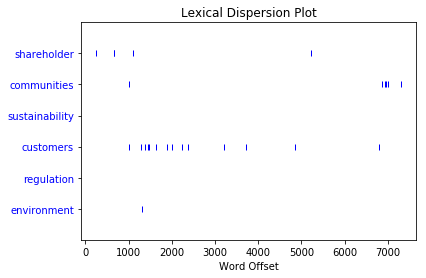

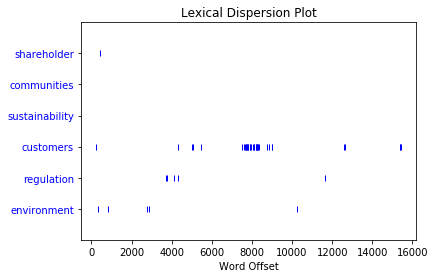

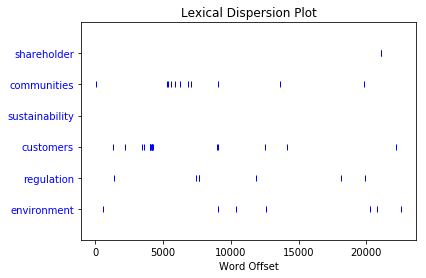

In [72]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
Text2005.dispersion_plot(['shareholder','communities', 'sustainability', 'customers' ,'regulation', 'environment'])
sns.set() #Re-enabling seaborn

sns.reset_orig() #Seaborn messes with this plot, disabling it
Text2010.dispersion_plot(['shareholder','communities', 'sustainability', 'customers' ,'regulation', 'environment'])
sns.set() #Re-enabling seaborn

sns.reset_orig() #Seaborn messes with this plot, disabling it
Text2016.dispersion_plot(['shareholder','communities', 'sustainability', 'customers' ,'regulation', 'environment'])
sns.set() #Re-enabling seaborn

# Filtering and normalizing text

As we want to start comparing the different releases we may choose to do a bit of filtering and normalizing that will allow us to focus on what we most care about. We can first make all of the words lower case, then drop the non-word tokens. Next, we can remove some 'stop words', stem the remaining words to remove suffixes, prefixes and (in some languages) infixes, or lemmatize tokens by intelligently grouping inflected or variant forms of the same word (e.g., with a stemmer and a dictionary). 

To begin this process, we will first define a function to work over the tokenized lists, then another to add normalized tokens to a new column.

Nltk has a built-in list of stopwords. They are already imported in the import section. Let's first take a look at what they are.

In [73]:
print(', '.join(stopwords.words('english')))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

We can remove these stopwords from the analysis by fiat, but we could also take a more principled approach by looking at the frequency distribution of words and selecting a specific cut-off associated with the preservation of 'meaningful words' identified upon inspection. Alternatively, we could automatically set a cut-off by rule, such as removal of all words more frequent then the most frequent verb, or the most frequent noun (not pronoun), or some term of central interest. 

Lets generate our own stop list now.

In [74]:
countsDict = {}
for word in whReleases['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('the', 179),
 (',', 173),
 ('.', 136),
 ('of', 112),
 ('to', 112),
 ('and', 108),
 ('in', 64),
 ('a', 61),
 ("'s", 50),
 ('that', 41),
 ('our', 39),
 ('for', 35),
 ('on', 33),
 ('is', 33),
 ('Whitehouse', 31),
 ('``', 30),
 ('Iraq', 28),
 ('Bush', 27),
 ('President', 25),
 ('(', 24)]

We can look at this and pick the cutoff, usually it is at the first noun. So we will cut all words before `'Whitehouse'`.

In [75]:
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'Whitehouse':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

'are'

Now we can create our function to normalize the tokens

In [77]:
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))

whReleases

,download_url,html_url,name,path,text,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Whitehouse123.txt,raw/Whitehouse/10Apr2007Whitehouse123.txt,SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY I...,"[SEN., WHITEHOUSE, SHARES, WESTERLY, GIRL, 'S,...",397,"[whitehous, share, westerli, girl, stori, push...",231
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Whitehouse2.txt,raw/Whitehouse/10Apr2008Whitehouse2.txt,SEN. WHITEHOUSE SAYS PRESIDENT BUSH MUST BEGIN...,"[SEN., WHITEHOUSE, SAYS, PRESIDENT, BUSH, MUST...",344,"[whitehous, say, presid, bush, must, begin, br...",171
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Whitehouse3.txt,raw/Whitehouse/10Apr2008Whitehouse3.txt,EPA MUST REVIEW LEGAL PROCESS TO ROOT OUT POLI...,"[EPA, MUST, REVIEW, LEGAL, PROCESS, TO, ROOT, ...",553,"[epa, must, review, legal, process, root, poli...",305
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2007Whitehouse78.txt,raw/Whitehouse/10Aug2007Whitehouse78.txt,R.I. SENATORS PRAISE SEN. DENIAL OF LNG FACILI...,"[R.I, ., SENATORS, PRAISE, SEN, ., DENIAL, OF,...",216,"[senat, prais, sen, denial, lng, facil, permit...",115
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Jan2008Whitehouse35.txt,raw/Whitehouse/10Jan2008Whitehouse35.txt,SEN. WHITEHOUSE COMMENTS ON ONE-YEAR ANNIVERSA...,"[SEN., WHITEHOUSE, COMMENTS, ON, ONE-YEAR, ANN...",257,"[whitehous, comment, anniversari, presid, bush...",132
5,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Mar2008Whitehouse8.txt,raw/Whitehouse/10Mar2008Whitehouse8.txt,"SENS. REED, WHITEHOUSE WELCOME RHODE ISLAND ST...","[SENS, ., REED, ,, WHITEHOUSE, WELCOME, RHODE,...",380,"[sen, reed, whitehous, welcom, rhode, island, ...",195
6,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Sep2007Whitehouse72.txt,raw/Whitehouse/10Sep2007Whitehouse72.txt,REP. WHITEHOUSE ISSUES STATEMENT ON GEN. PETRA...,"[REP., WHITEHOUSE, ISSUES, STATEMENT, ON, GEN....",270,"[whitehous, issu, statement, petraeu, iraq, re...",118
7,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,11Apr2007Whitehouse122.txt,raw/Whitehouse/11Apr2007Whitehouse122.txt,SEN. WHITEHOUSE URGES BUSH FOR NEW DIRECTION I...,"[SEN., WHITEHOUSE, URGES, BUSH, FOR, NEW, DIRE...",521,"[whitehous, urg, bush, new, direct, iraq, shel...",257
8,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,11Jan2007Whitehouse161.txt,raw/Whitehouse/11Jan2007Whitehouse161.txt,"SENS. REED, WHITEHOUSE URGE PORTUGAL TO RECONS...","[SENS, ., REED, ,, WHITEHOUSE, URGE, PORTUGAL,...",484,"[sen, reed, whitehous, urg, portug, reconsid, ...",254
9,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,11Mar2008Whitehouse7.txt,raw/Whitehouse/11Mar2008Whitehouse7.txt,WHITEHOUSE UNVEILS 'BUSH DEBT': $7.7 TRILLION ...,"[WHITEHOUSE, UNVEILS, 'BUSH, DEBT, ', :, $, 7....",482,"[whitehous, unveil, debt, trillion, foregon, s...",260


The stemmer we use here is called the [Porter Stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter), there are many others, including another good one by the same person (Martin Porter) called the [Snowball Stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.snowball) or 'another stemmer' called the [Lancaster Stemmer](http://www.nltk.org/_modules/nltk/stem/lancaster.html). We can also normalize our words by lemmatizing them, or matching word variants or inflected forms to a common morpheme in a dictionary like [WordNet](https://wordnet.princeton.edu) through intelligent stemming rules. (The WordNet function `morphy` returns the given word if it cannot be matched to a word in the dictionary).

Now that it is cleaned we start analyzing the dataset. We can start by finding frequency distributions for the dataset. Lets start looking at all the press releases together. The [`ConditionalFreqDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) class reads in an iterable of tuples, the first element is the condition and the second the focal word. For starters, we will use word lengths as the conditions, but tags or clusters will provide more useful results.

In [78]:
#.sum() adds together the lists from each row into a single list
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in whReleases['normalized_tokens'].sum()))

#print the number of words
print(whcfdist.N())

2038


From this we can lookup the distributions of different word lengths

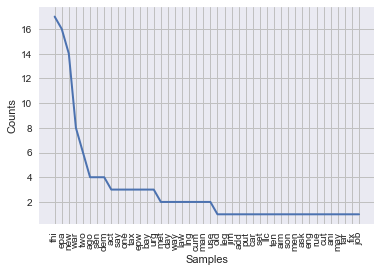

In [79]:
whcfdist[3].plot()

See that the most frequent 3-character word is "thi". But what is "thi"? It is actually "this" stemmed by the Porter Stemmer. 

In [80]:
porter = nltk.stem.porter.PorterStemmer()
print (porter.stem('this'))

thi


Let's try with the Snowball Stemer. See that "this" is corretly stemmed as a 4-character word. 

this


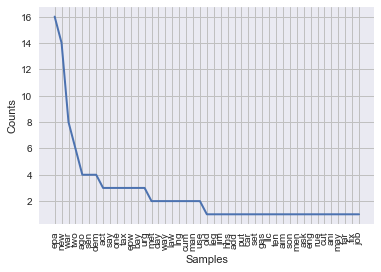

In [81]:
print (snowball.stem('this'))

whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))
whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in whReleases['normalized_tokens'].sum()))
whcfdist[3].plot()

We can also create a Conditional Probability Distribution or [`ConditionalProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) from the `ConditionalFreqDist`. To do this, however, we need a model for the probability distribution. A simple model is [`ELEProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ELEProbDist) which gives the expected likelihood estimate for the probability distribution of the experiment used to generate the observed frequency distribution. 

In [82]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(whcpdist[2].max())

#And its probability
print(whcpdist[2].prob(whcpdist[2].max()))

us
0.6470588235294118


Length is one feature of a word, but there are many more important features we care about. Another critical feature is a word's role in the sentence, or its part of speech (POS). Here, we will be classifying words according to their part of speech (POS), using the [`nltk.pos_tag()`](http://www.nltk.org/api/nltk.tag.html#nltk.tag.pos_tag). The tags used here are those from the [Brown Corpus tagset](http://www.scs.leeds.ac.uk/amalgam/tagsets/brown.html).

In [83]:
whReleases['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in whReleases['normalized_tokens']]

This gives us a new column with the part of speech as a short initialism and the word in a tuple, exactly how the `nltk.ConditionalFreqDist()` function wants them. We can now construct another conditional frequency distribution.

In [84]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(whReleases['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[:10]

[('whitehous', FreqDist({'JJ': 39, 'NN': 1})),
 ('share', FreqDist({'NN': 4})),
 ('wester', FreqDist({'NN': 1, 'RBR': 1})),
 ('girl', FreqDist({'NN': 2})),
 ('stori', FreqDist({'FW': 2})),
 ('push', FreqDist({'NN': 2})),
 ('stem', FreqDist({'NN': 12})),
 ('cell', FreqDist({'NN': 9, 'VBP': 3})),
 ('research', FreqDist({'NN': 9})),
 ('lila', FreqDist({'CD': 1, 'JJ': 1, 'NN': 2}))]

This gives the frequency of each word as each part of speech...which can be uninformative and boring.

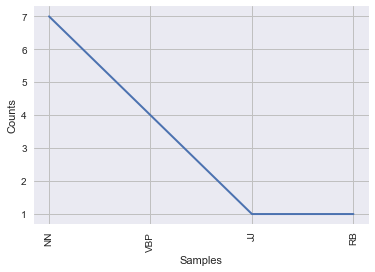

In [85]:
whcfdist_WordtoPOS['administr'].plot()

What we want is the converse; the frequency of each part of speech for each word.

In [86]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in whReleases['normalized_tokens_POS'].sum())

We can now identify and collect all of the superlative adjectives

In [87]:
whcfdist_POStoWord['JJS']

FreqDist({'best': 1, 'strongest': 2})

Or look at the most common nouns

In [88]:
whcfdist_POStoWord['NN'].most_common(5)

[('bush', 24), ('presid', 23), ('iraq', 22), ('rhode', 18), ('island', 18)]

Or plot the base form verbs against their number of occurrences

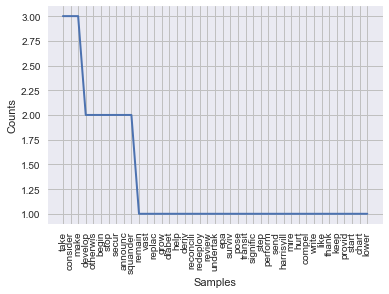

In [89]:
whcfdist_POStoWord['VB'].plot()

We can then do a similar analysis of the word probabilities

In [90]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(whcpdist_POStoWord['NN'].max())

#And its probability
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

bush
0.017844136926438457


We can even create a...wait for it...*WORD CLOUD* or Wordl to gaze at and draw mystical, approximate inferences about important nouns and verbs in our corpus:

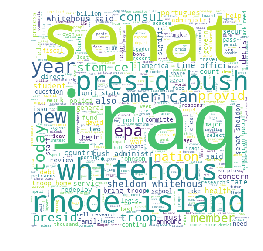

In [91]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(whReleases['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

the following is a dataframe of annual shareholder letter texts from dow jones companies between the years 2004-2017

note: I used optimal character recognition (OCR) to convert some of the pdfs to text. They will not be very useful.

In [153]:
df = pandas.read_pickle('C:\\Users\\Andrew\\content-analysis-2018\\2-Corpus-Linguistics\\pandasDF.pkl')

In [154]:
print(df.head(5))

                    company  \
0                3M Letter    
1             Alcoa Letter    
2  American Express Letter    
3              AT&T Letter    
4            Boeing Letter    

                                                text  year  
0  dear shareholder:\n\nthanks to the hard work o...  2000  
1  luluâ\nmumÂ» nl am.â\n\n \n\n \n\n1â0 ai...  2000  
2  cardmembers, a reflection of our successful ef...  2000  
3  the transformation of at&t\n\nthree years ago ...  2000  
4  here is our plan for growing the boeing compan...  2000  


In [155]:
df['words'] = df['text'].apply(nltk.word_tokenize)

In [156]:
print(df.head(5))

                    company  \
0                3M Letter    
1             Alcoa Letter    
2  American Express Letter    
3              AT&T Letter    
4            Boeing Letter    

                                                text  year  \
0  dear shareholder:\n\nthanks to the hard work o...  2000   
1  luluâ\nmumÂ» nl am.â\n\n \n\n \n\n1â0 ai...  2000   
2  cardmembers, a reflection of our successful ef...  2000   
3  the transformation of at&t\n\nthree years ago ...  2000   
4  here is our plan for growing the boeing compan...  2000   

                                               words  
0  [dear, shareholder, :, thanks, to, the, hard, ...  
1  [luluâ, mumÂ, », nl, am.â, 1â0, aicoa, s...  
2  [cardmembers, ,, a, reflection, of, our, succe...  
3  [the, transformation, of, at, &, t, three, yea...  
4  [here, is, our, plan, for, growing, the, boein...  


generate stop list

In [157]:
countsDict = {}
for word in df['words'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:60]

[(',', 32948),
 ('.', 26687),
 ('and', 25208),
 ('the', 24680),
 ('to', 18833),
 ('of', 15941),
 ('in', 13815),
 ('our', 13188),
 ('we', 10490),
 ('a', 9700),
 ('for', 5953),
 ('that', 5669),
 ('is', 5373),
 ('are', 4981),
 ('with', 4133),
 ('$', 3996),
 ('on', 3904),
 ('have', 3582),
 ('We', 3421),
 ('as', 3415),
 ('more', 3333),
 ('will', 2941),
 ('by', 2718),
 ('(', 2601),
 ('this', 2587),
 ('%', 2511),
 ('business', 2508),
 ('new', 2406),
 ('be', 2305),
 (')', 2276),
 ('from', 2159),
 (':', 2106),
 ('it', 2083),
 ('year', 2056),
 ('growth', 2021),
 ('at', 1971),
 ('than', 1947),
 ('an', 1801),
 ('billion', 1786),
 ('&', 1677),
 ('has', 1639),
 ('not', 1578),
 ('us', 1551),
 ('company', 1538),
 ('customers', 1529),
 ('their', 1492),
 ('also', 1487),
 ('all', 1482),
 ('The', 1427),
 ('In', 1379),
 (';', 1347),
 ('which', 1326),
 ('these', 1293),
 ('or', 1289),
 ('was', 1269),
 ('can', 1269),
 ('years', 1250),
 ('they', 1233),
 ('businesses', 1194),
 ('Our', 1173)]

In [158]:
#The stop list is then all words that occur before the word 'company
stop_words_freq = []
for word, count in word_counts:
    if word == 'company':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

'are'

using the previous function (normalizeTokens), with my newly created stopword list, 

In [159]:
#note: the code is copypasta from above, just so I can see it and change if necessary to fit my data
stop_words_nltk = stopwords.words('english')
stop_words = stop_words_freq #note stop_words comprise 

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

df['normalized_tokens'] = df['words'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words, stemmer = porter))

df['normalized_tokens_count'] = df['normalized_tokens'].apply(lambda x: len(x))

df
print(df.head(5))

                    company  \
0                3M Letter    
1             Alcoa Letter    
2  American Express Letter    
3              AT&T Letter    
4            Boeing Letter    

                                                text  year  \
0  dear shareholder:\n\nthanks to the hard work o...  2000   
1  luluâ\nmumÂ» nl am.â\n\n \n\n \n\n1â0 ai...  2000   
2  cardmembers, a reflection of our successful ef...  2000   
3  the transformation of at&t\n\nthree years ago ...  2000   
4  here is our plan for growing the boeing compan...  2000   

                                               words  \
0  [dear, shareholder, :, thanks, to, the, hard, ...   
1  [luluâ, mumÂ, », nl, am.â, 1â0, aicoa, s...   
2  [cardmembers, ,, a, reflection, of, our, succe...   
3  [the, transformation, of, at, &, t, three, yea...   
4  [here, is, our, plan, for, growing, the, boein...   

                                   normalized_tokens  normalized_tokens_count  
0  [dear, sharehold, th

look at the frequency distribution of three letter words after the previous normalization

In [160]:
#.sum() adds together the lists from each row into a single list
letters_fdist = nltk.ConditionalFreqDist(((len(w), w) for w in df['normalized_tokens'].sum()))

#print the number of words
print(letters_fdist.N())

378066


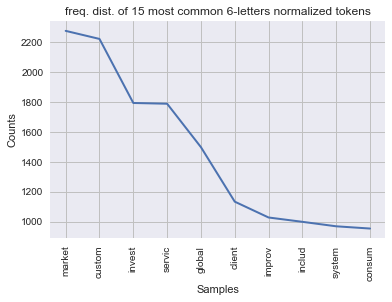

In [161]:
letters_fdist[6].plot(10,title = 'freq. dist. of 15 most common 6-letters normalized tokens')

In [237]:
all_normalized_torkens = df['normalized_tokens'].sum()
freq_all_normalized_tokens = wordCounter(all_normalized_torkens)
freq_all_normalized_tokens.sort_values('count', ascending=False, inplace=True)
freq_all_normalized_tokens['prob'] = freq_all_normalized_tokens['count']/freq_all_normalized_tokens.shape[0]

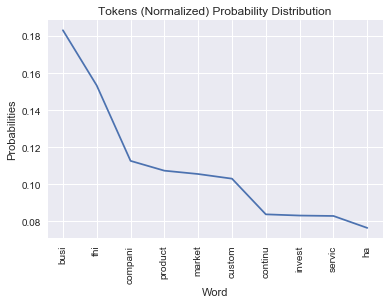

In [238]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sorted(freq_all_normalized_tokens['word'][:10]), freq_all_normalized_tokens['prob'][:10])
plt.title("Tokens (Normalized) Probability Distribution")
plt.ylabel("Probabilities")
plt.xlabel("Word")
ax.set_xticklabels(freq_all_normalized_tokens['word'].tolist()[:10])
plt.xticks(rotation='vertical')
plt.show()

now tag the parts of speech for analysis

In [162]:
df['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in df['normalized_tokens']]

In [163]:
letters_fdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in df['normalized_tokens_POS'].sum())

In [164]:
print('the most common nouns are: ')
print(letters_fdist_POStoWord['NN'].most_common(20))

the most common nouns are: 
[('busi', 2978), ('product', 2316), ('market', 2277), ('thi', 1962), ('custom', 1942), ('compani', 1792), ('bank', 1639), ('world', 1233), ('continu', 1227), ('ha', 1209), ('share', 1193), ('client', 1133), ('time', 1109), ('capit', 1075), ('technolog', 1056), ('work', 1018), ('system', 968), ('manag', 943), ('percent', 897), ('i', 828)]


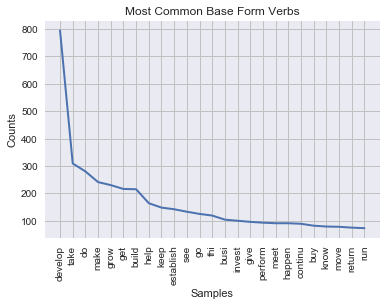

In [165]:
letters_fdist_POStoWord['VB'].plot(25, title='Most Common Base Form Verbs')

note the below code: using the probability distribution provided in the professor's code, the corpus is so large that even though busi is the most common normalized noun, it has an extremely low probability of being a specific word in the corpus, given that it is a noun.

In [175]:
letters_pdist_POStoWord = nltk.ConditionalProbDist(letters_fdist_POStoWord, nltk.ELEProbDist)

#print the most common noun
print(letters_pdist_POStoWord['NN'].max())

#And its probability
print(letters_pdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

busi
3.950211533827637e-06


In [176]:
#print the most common verb
print(letters_pdist_POStoWord['VB'].max())

#And its probability
print(letters_pdist_POStoWord['VB'].prob(whcpdist_POStoWord['VB'].max()))

develop
0.032772130453197795


note: the high probability of a word in the corpus being the word 'develop' given that the word is a verb. This is much higher than the word being 'business' given that the word is a noun.

FINALLY: Check out this really basic word cloud I made. It says that companies talk about their business quite a bit. Also that they are interested in investments, markets, and their product. Note: 'global' along the right side; this indicates that Dow Jones companies (large organizations) are concerned about global affairs and discuss them with their shareholders.

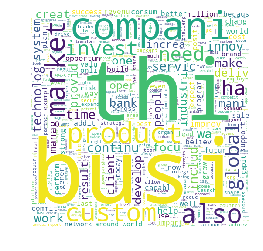

In [142]:
cloudy = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df['normalized_tokens'].sum()))
plt.imshow(cloudy)
plt.axis("off")
plt.savefig("annual shareholder letters Dow Jones Word Cloud.pdf", format = 'pdf')

# Collocations

As illustrated above, we might want to find significant bigrams (two-word phrases), trigrams (three-word phrases), n-grams (*n*-word phrases) or skip-grams (noncontinguous 'phrases' with skip-length *n*). We will begin with the [`nltk.collocations.BigramCollocationFinder`](http://www.nltk.org/api/nltk.html?highlight=bigramcollocationfinder#nltk.collocations.BigramCollocationFinder) class, which can be given raw lists of strings with the `from_words()` method. By default it only looks at continuous bigrams but there is an option (`window_size`) to allow skip-grams.

In [177]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(whBigrams.N))

There are 1999 bigrams in the finder


To compare the bigrams we need to tell nltk what our score function is. Initially, we will look at the raw counts.

In [178]:
def bigramScoring(count, wordsTuple, total):
    return count

print(whBigrams.nbest(bigramScoring, 10))

[('rhode', 'island'), ('presid', 'bush'), ('sheldon', 'whitehous'), ('stem', 'cell'), ('whitehous', 'said'), ('bush', 'administr'), ('american', 'peopl'), ('bring', 'troop'), ('senat', 'sheldon'), ('troop', 'home')]


One note about how `BigramCollocationFinder` works. It doesn't use the strings internally.

In [179]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

whBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  40, The second word is: 4
The first word is:  4, The second word is: 2
The first word is:  2, The second word is: 2
The first word is:  2, The second word is: 2
The first word is:  2, The second word is: 2
The first word is:  2, The second word is: 12
The first word is:  12, The second word is: 12
The first word is:  12, The second word is: 9
The first word is:  9, The second word is: 4
The first word is:  4, The second word is: 2


The words are each given numeric IDs and there is a dictionary that maps the IDs to the words they represent. This is a common performance optimization.

Two words can appear together by chance. Recall from  Manning and Schütze's textbook that a $t-value can be computed for each bigram to see how significant the association is. You may also want to try computing the $\chi^2$, likelihood ratio, and pointwise mutual information statistics. 

In [180]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('rhode', 'island'), 223.98603169548517),
 (('stem', 'cell'), 146.69971583676724),
 (('presid', 'bush'), 124.78339903371592),
 (('sheldon', 'whitehous'), 97.83057167237577),
 (('unit', 'state'), 63.7408597571739),
 (('whitehous', 'said'), 50.85365409523493),
 (('jack', 'reed'), 46.61449955206517),
 (('honor', 'societi'), 45.00623576992483),
 (('american', 'peopl'), 44.4949166648486),
 (('bring', 'troop'), 43.29082241816299),
 (('bush', 'administr'), 42.73672706610401),
 (('cell', 'research'), 41.25934273451902),
 (('youth', 'program'), 38.276119099832265),
 (('troop', 'home'), 36.87601441962918),
 (('come', 'home'), 36.661589434392276),
 (('senat', 'sheldon'), 36.08708619238288),
 (('epw', 'committe'), 34.42122395939712),
 (('potenti', 'close'), 33.7794434582587),
 (('budget', 'resolut'), 32.192797473966614),
 (('district', 'columbia'), 31.62701894759353),
 (('humpti', 'dumpti'), 31.62701894759353),
 (('jose', 'socrat'), 31.62701894759353),
 (('prime', 'minist'), 31.62701894759353),


There are a few other available measures

In [181]:
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

We can also look at trigrams

In [182]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('bring', 'troop', 'home'), 2.449202865677887),
 (('senat', 'sheldon', 'whitehous'), 2.4481166557834917),
 (('stem', 'cell', 'research'), 2.2359229352888974),
 (('whitehous', 'said', 'today'), 1.9987987990993996),
 (('jack', 'reed', 'sheldon'), 1.7319953264758123),
 (('senat', 'youth', 'program'), 1.7319901251233376),
 (('unit', 'state', 'senat'), 1.73173525885207),
 (('new', 'direct', 'iraq'), 1.7316624399174225),
 (('reed', 'sheldon', 'whitehous'), 1.7314959966382275),
 (('sheldon', 'whitehous', 'said'), 1.7309411857075774),
 (('trillion', 'foregon', 'surplus'), 1.414209315486583),
 (('reconsid', 'potenti', 'close'), 1.4142064842289084),
 (('sent', 'clear', 'messag'), 1.414205599460885),
 (('today', 'confirm', 'hear'), 1.4141976365486753),
 (('select', 'committe', 'intellig'), 1.4141965748270473),
 (('general', 'david', 'petraeus'), 1.4141923279405353),
 (('take', 'respons', 'secur'), 1.4141923279405353),
 (('cell', 'enhanc', 'act'), 1.4141880810540235),
 (('respons', 'secur', 'gov

Or n-grams (for any number n)

In [183]:
Ngrams = nltk.ngrams(whReleases['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('stem', 'cell', 'research', 'whitehous'): 2, ('stem', 'cell', 'enhanc', 'act'): 2, ('begin', 'bring', 'troop', 'home'): 2, ('bring', 'troop', 'home', 'iraq'): 2, ('senat', 'sheldon', 'whitehous', 'said'): 3, ('sheldon', 'whitehous', 'said', 'today'): 3, ('member', 'senat', 'select', 'committe'): 2, ('senat', 'select', 'committe', 'intellig'): 2, ('take', 'respons', 'secur', 'govern'): 2, ('senat', 'jack', 'reed', 'sheldon'): 2, ('jack', 'reed', 'sheldon', 'whitehous'): 3, ('whitehous', 'welcom', 'rhode', 'island'): 2, ('portugues', 'american', 'citizen', 'rhode'): 2, ('american', 'citizen', 'rhode', 'island'): 2}


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [186]:
dfBigrams = nltk.collocations.BigramCollocationFinder.from_words(df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(dfBigrams.N))
def bigramScoring(count, wordsTuple, total):
    return count

print(dfBigrams.nbest(bigramScoring, 10))

birgramSc = []

def bigramPrinting(count, wordsTuple, total):
    global birgramSc
    birgramSc.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

dfBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramSc[:10]))

bigram_measures = nltk.collocations.BigramAssocMeasures()
dfBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

There are 378066 bigrams in the finder
[('around', 'world'), ('p', 'g'), ('per', 'share'), ('annual', 'report'), ('jpmorgan', 'chase'), ('ha', 'been'), ('unit', 'state'), ('small', 'busi'), ('earn', 'per'), ('chief', 'execut')]
The first word is:  54, The second word is: 848
The first word is:  848, The second word is: 186
The first word is:  186, The second word is: 163
The first word is:  163, The second word is: 1140
The first word is:  1140, The second word is: 1
The first word is:  1, The second word is: 1
The first word is:  1, The second word is: 1
The first word is:  1, The second word is: 168
The first word is:  168, The second word is: 1052
The first word is:  1052, The second word is: 154


[(('around', 'world'), 4331.010158444547),
 (('p', 'g'), 4238.283966131373),
 (('jpmorgan', 'chase'), 4086.000928157557),
 (('annual', 'report'), 3333.2873394876756),
 (('per', 'share'), 3177.1865084714273),
 (('unit', 'state'), 2786.073434795363),
 (('american', 'express'), 2522.1044470252227),
 (('balanc', 'sheet'), 2486.0892840447827),
 (('chief', 'execut'), 2391.9268390641214),
 (('ha', 'been'), 2083.9839692030264),
 (('earn', 'per'), 2001.8163402039931),
 (('health', 'care'), 1912.6904459413086),
 (('over', 'past'), 1688.8407458422603),
 (('r', 'd'), 1625.377345286674),
 (('small', 'busi'), 1601.2260077776582),
 (('everi', 'day'), 1396.5511525923716),
 (('net', 'incom'), 1345.8998207607237),
 (('competit', 'advantag'), 1283.6867097787224),
 (('i', 'am'), 1274.9598800161973),
 (('stress', 'test'), 1237.2481569085824),
 (('suppli', 'chain'), 1233.1690109914869),
 (('goldman', 'sach'), 1213.3545717817924),
 (('same', 'time'), 1163.7460460249902),
 (('s', 'p'), 1161.195486654997),
 ((

In [188]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
dfTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(df['normalized_tokens'].sum())
dfTrigrams.score_ngrams(trigram_measures.likelihood_ratio)[:20]

[(('earn', 'per', 'share'), 7957.824553838864),
 (('peopl', 'around', 'world'), 6717.081468435192),
 (('countri', 'around', 'world'), 6645.77878879146),
 (('employe', 'around', 'world'), 6630.3576167751735),
 (('market', 'around', 'world'), 6628.445725352392),
 (('commun', 'around', 'world'), 6589.021135284087),
 (('organ', 'around', 'world'), 6571.019006874456),
 (('all', 'around', 'world'), 6554.271210341185),
 (('custom', 'around', 'world'), 6546.2079145316275),
 (('around', 'world', 'where'), 6542.314648740399),
 (('locat', 'around', 'world'), 6541.297283100214),
 (('around', 'world', 'popul'), 6540.309842924802),
 (('around', 'world', 'skyscrap'), 6537.051522975758),
 (('around', 'world', 'leader'), 6534.459592786185),
 (('around', 'world', 'ha'), 6533.681778783744),
 (('client', 'around', 'world'), 6533.178616060835),
 (('around', 'world', 'better'), 6533.010534927002),
 (('center', 'around', 'world'), 6532.474795632315),
 (('muniti', 'around', 'world'), 6531.334654600883),
 (('s

In [194]:
Ngrams = nltk.ngrams(df['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 10:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('reproduc', 'permiss', 'copyright', 'owner'): 19, ('permiss', 'copyright', 'owner', 'further'): 19, ('copyright', 'owner', 'further', 'reproduct'): 19, ('owner', 'further', 'reproduct', 'prohibit'): 19, ('further', 'reproduct', 'prohibit', 'without'): 19, ('presid', 'chief', 'execut', 'offic'): 28, ('chairman', 'chief', 'execut', 'offic'): 26, ('earn', 'per', 'share', 'were'): 17, ('per', 'share', 'were', 'up'): 11, ('chairman', 'board', 'chief', 'execut'): 17, ('earn', 'per', 'share', 'increas'): 17, ('annual', 'report', 'letter', 'sharehold'): 20, ('dilut', 'earn', 'per', 'share'): 44, ('sharehold', 'custom', 'partner', 'employe'): 11, ('board', 'presid', 'chief', 'execut'): 13, ('earn', 'per', 'share', 'continu'): 18, ('per', 'share', 'continu', 'oper'): 15, ('chairman', 'presid', 'chief', 'execut'): 17, ('dow', 'jone', 'industri', 'averag'): 11, ('return', 'tangibl', 'common', 'equiti'): 14, ('report', 'net', 'incom', 'roe'): 12, ('board', 'chief', 'execut', 'offic'): 11, ('money

In [193]:
Ngrams = nltk.ngrams(df['normalized_tokens'].sum(), 5)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 10:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('reproduc', 'permiss', 'copyright', 'owner', 'further'): 19, ('permiss', 'copyright', 'owner', 'further', 'reproduct'): 19, ('copyright', 'owner', 'further', 'reproduct', 'prohibit'): 19, ('owner', 'further', 'reproduct', 'prohibit', 'without'): 19, ('earn', 'per', 'share', 'were', 'up'): 11, ('earn', 'per', 'share', 'continu', 'oper'): 15, ('chairman', 'board', 'chief', 'execut', 'offic'): 11, ('money', 'so', 'they', 'can', 'live'): 10, ('so', 'they', 'can', 'live', 'better'): 10, ('annual', 'report', 'annual', 'report', 'annual'): 14, ('report', 'annual', 'report', 'annual', 'report'): 14, ('tangibl', 'book', 'valu', 'per', 'share'): 32, ('cisco', 'system', 'annual', 'report', 'letter'): 11, ('system', 'annual', 'report', 'letter', 'sharehold'): 11, ('compound', 'annual', 'gain', 'overal', 'gain'): 15, ('sharehold', 'financi', 'result', 'marketplac', 'move'): 11, ('financi', 'result', 'marketplac', 'move', 'sharehold'): 11, ('result', 'marketplac', 'move', 'sharehold', 'return'): 1

To study idioms in these letters, let's return to the single letter from the JPMorgan Chase CEO in 2005

In [195]:
Text2005.collocations()

JPMorgan Chase; Wealth Management; Investment Bank; Securities
Services; interest rate; Commercial Banking; New York; credit card;
corporate citizen; investment banking; Card Services; North Carolina;
asset-backed securities; wire transfer; lower cost; two years; Chief
Executive; Great teams; broad range; credit cards


Note: credit card is a technical term dependant on both words being together. How is 'credit' commonly used in the corpus?

In [196]:
Chase2005Index = nltk.text.ConcordanceIndex(Text2005)
Chase2005Index.print_concordance('credit')
print('*********************************************')
Chase2010Index = nltk.text.ConcordanceIndex(Text2010)
Chase2010Index.print_concordance('credit')
print('*********************************************')
Chase2016Index = nltk.text.ConcordanceIndex(Text2016)
Chase2016Index.print_concordance('credit')
print('*********************************************')

Displaying 20 of 20 matches:
s , home equity loans , debit and credit cards , and online bill paying se
ouseholds Ð joins forces with our credit cardcompany , with its 110 millio
of recent efforts are promising : credit card sales in our retail branches
ams lower our risk , increase our credit ratings and reduce the cost of ou
 thatwhen it happens , our annual credit costs will increase sub-stantiall
 include:7¥Completing the largest credit card conversion in history . This
ed the Sears Canada private-label credit card portfolio . In addition , we
 deposits , checking accounts and credit cards . Commercial Banking achiev
estingin state-of-the-art ÒblinkÓ credit card technology ( whichenables cu
y ( whichenables customers to use credit cards for small payments without 
 , such as global cash clearing , credit card , retail branches and some o
cluding : ¥Consumer and wholesale credit risk¥Market and trading risk¥Inte
lan for it.Consumer and wholesale credit riskOver the years , our compa

note above that while 'credit' appears regularly in these documents, 'credit card' is a specific technical term. In these letters, it seems that idioms are less common, but technical terms commonly group multiple words.

# Distributional distances

If we want to compare different corpora, we need a distance or divergence that compares the two distributions.

We will use the: 

+ Kullback-Leibler (KL) divergence
+ $\chi^2$ divergence
+ Kolmogorov-Smirnov (KS) distance
+ Wasserstein distance

### Kullback-Leibler and $x^2$ divergences ###

KL and $\chi^2$ divergences are members of the broader <a "href=https://en.wikipedia.org/wiki/F-divergence" target="_blank">$f$-divergence</a> family, a function of $D_f (P || Q)$ that calculates the difference between two probability distributions P and Q. The KL $f(t)$ is $ t \text{ log } t $, while the $\chi^2$ is $t^2-1$. KL comes from information and $\chi^2$ from measure theory. As such, the KL divergence computes the relative entropy between two distributions--how they differ in bits, while the $\chi^2$ whether the same statistical inferences can be drawn from them both.  

Specifically, given two discrete probability distributions $P$ and $Q$, the Kullback-Leibler divergence from $Q$ to $P$ is defined as:

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$.

The [scipy.stats.entropy()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) function does the calculation for you, which takes in two arrays of probabilities and computes the KL divergence. Note that the KL divergence is in general not commutative, i.e. $D_{\mathrm{KL}}(P\|Q) \neq D_{\mathrm{KL}}(Q\|P)$ .

Also note that the KL divernce is the sum of elementwise divergences. Scipy provides [scipy.special.kl_div()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kl_div.html#scipy-special-kl-div) which calculates elementwise divergences for you.

The $\chi^2$ Divergence is defined as:

$D_{\mathrm{\chi^2}}(P\|Q) = \sum_i \left(\frac{P(i)}{Q(i)}-1\right)^2$. 

This is also noncommutative, and the code can be drawn directly from scipy.

### Kolmogorov-Smirnov ###

The two-sample Kolmogovorov-Smirnov test statistic calculates the distance between the cumulative distribution function of the two distributions to be compared, and, along with the $x^2$ divergence, is among the most common approaches two calculating a distance in statistics. It can be interpreted as a test of whether two distributions are drawn from the same underlying distribution. As with the others, the code is readily available in scipy.

### Wasserstein Distance ###

When this is computed on a Euclidian metric structure (e.g., numbers of words), this is also known as the earth mover’s distance, because it can be seen as the minimum amount of "work" required to transform $P$ into $Q$, where "work" is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved.

### Computing ###

To do this we will need to create the arrays, lets compare the Whitehouse releases with the Kennedy releases. First we have to download them and load them into a DataFrame.

In [197]:
kenReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Kennedy', maxFiles = 10)
kenReleases[:5]

,download_url,html_url,name,path,text
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Apr2005Kennedy14.txt,raw/Kennedy/01Apr2005Kennedy14.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2005Kennedy12.txt,raw/Kennedy/01Aug2005Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy10.txt,raw/Kennedy/01Aug2006Kennedy10.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy11.txt,raw/Kennedy/01Aug2006Kennedy11.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy12.txt,raw/Kennedy/01Aug2006Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...


Then we can tokenize, stem and remove stop words, like we did for the Whitehouse press releases

In [198]:
kenReleases['tokenized_text'] = kenReleases['text'].apply(lambda x: nltk.word_tokenize(x))
kenReleases['normalized_tokens'] = kenReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

Now we need to compare the two collection of words, remove those not found in both, and assign the remaining ones indices.

In [199]:
whWords = set(whReleases['normalized_tokens'].sum())
kenWords = set(kenReleases['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = whWords & kenWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['student']

60

Now we can count the occurrences of each word in the corpora and create our arrays. Note that we don't have to use numpy arrays as we do here. We could just use a list, but the arrays are faster in numpy so we encourage you to get in the habit of using them.

In [200]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

whProbArray = makeProbsArray(whReleases['normalized_tokens'], overlapWordsDict)
kenProbArray = makeProbsArray(kenReleases['normalized_tokens'], overlapWordsDict)
kenProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

1.0

We can now compute the KL divergence. Pay attention to the asymmetry. Use [the Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), which is the average KL divergence between each distribution and the average of both distributions (i.e., the midpoint), if you want symmetry.

In [201]:
wh_kenDivergence = scipy.stats.entropy(whProbArray, kenProbArray)
print (wh_kenDivergence)
ken_whDivergence = scipy.stats.entropy(kenProbArray, whProbArray)
print (ken_whDivergence)

0.6176419677476954
0.5877085657188856


Then, we can do the elementwise calculation and see which words best distinguish the two corpora.

In [202]:
wh_kenDivergence_ew = scipy.special.kl_div(whProbArray, kenProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = wh_kenDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,staff,0.005358
1,govern,0.000029
2,begin,0.005358
3,told,0.000796
4,focus,0.000063
5,far,0.000063
6,clear,0.002725
7,fact,0.001568
8,condit,0.002023
9,white,0.000048


In [203]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
30,iraq,0.086929
146,bush,0.042354
205,stem,0.021884
18,law,0.020547
10,protect,0.019358
56,american,0.018154
92,depart,0.017650
290,bring,0.014128
76,member,0.012429
143,war,0.011739


Now we will apply what we learned today to the Guternberg texts in nltk and see if we can detect patterns between them. 

First, let's transform every text into normalized tokens. Note that in this first step, no stopword is removed. 

In [204]:
fileids = nltk.corpus.gutenberg.fileids()
corpora = []
for fileid in fileids:
    words = nltk.corpus.gutenberg.words(fileid)
    normalized_tokens = normlizeTokens(words, stopwordLst = [], stemmer = snowball)
    corpora.append(normalized_tokens)

Then, let's separate the normalized tokens into stopwords and non-stopwords.

In [205]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    for word in corpus:
        if word in stop_words_nltk:
            s.append(word)
        else:
            nons.append(word)
    corpora_s.append(s)
    corpora_nons.append(nons)

Define some covenient funtions for calculating divergence and distances.

In [206]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Now we will calculate the KL divergence for each pair of corpora, turn the results into a matrix, and visualize the matrix as a heatmap. Recall that $D_{\mathrm{KL}}(P\|Q)$ measures the amount of information loss when $Q$ is used to approximate $P$. Here, the rows are the $P$s used for calculating KL divergences, and the columns are the $Q$s. So, each cell measures the amount of information loss when the word distribution of the column text is used to approximate the word distribution of the row text. Because the KL divergence is directional, such that the divergence of $P$ from $Q$ is different from the same of $Q$ from $P$, the matrix is assymetric and contains unique information above and below the diagonal. The same is true for the $\chi^2$ divergence.

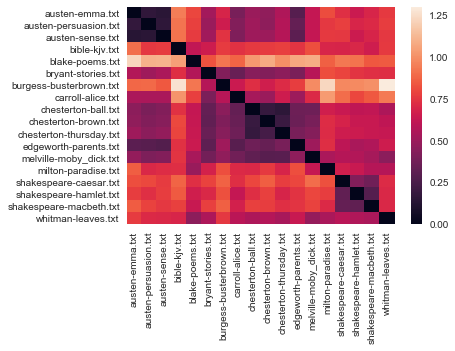

In [207]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Note that works by the same author have the lowest within-group KL divergences. 

To reveal more patterns, let's do a multidimensional scaling of the matrix.

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


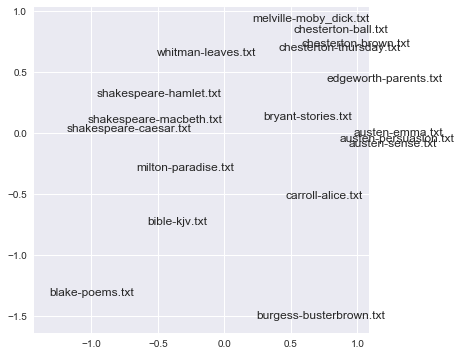

In [208]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

Do you see any patterns in the image shown above? Does it make sense?

We may just want to focus on the distrbution of stopwords or non-stopwords. Let's do the analysis again first for stopwords and then for non-stopwords.

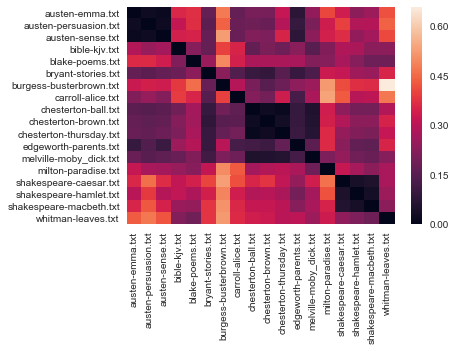

In [209]:
L = []
for p in corpora_s:
    l = []
    for q in corpora_s:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

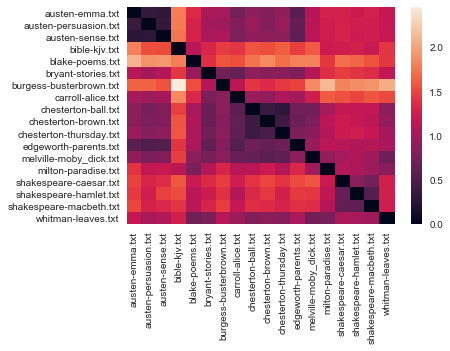

In [210]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Now we compute the same for the assymmetric $\chi^2$ Divergence.

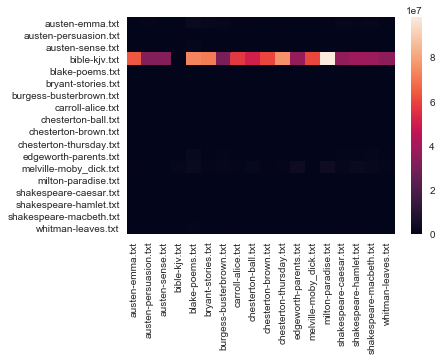

In [211]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

For the KS distance:

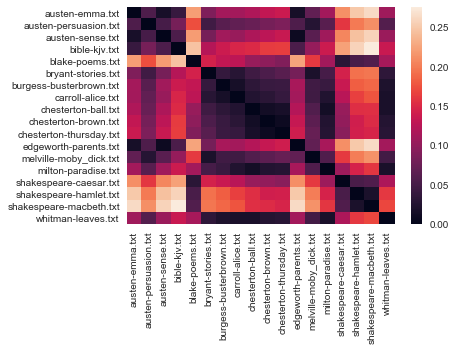

In [212]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

And finally for the Wasserstein or "earth mover's" Distance.

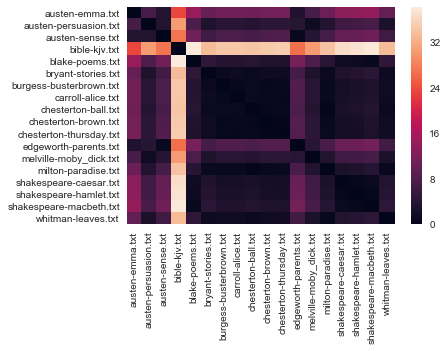

In [213]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

You can see that the Bible is highly divergent and this makes reading the plot somewhat difficult. Let's fix this by taking the log of each cell, which will reduce the distance of the Bible from other texts as an outlier.

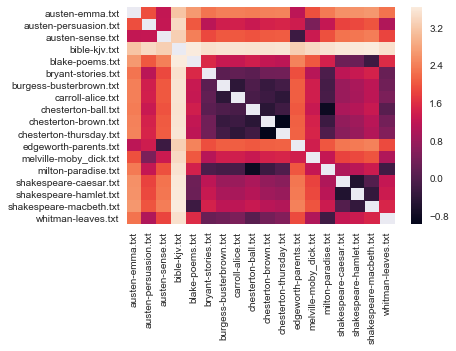

In [214]:
ax = sns.heatmap(div.apply(np.log).replace([np.inf, -np.inf], np.nan))
plt.show()

This is more legible, as it continues to show that the Bible is divergent, but other structure is also visible, such as the divergence of Austen's *Emma* and *Sense and Sensibility*, and Edgeworth's *The Parent's Assistant*. 

If we want to rerun this on a new data set of our own composition, we can be a bit more efficient with our coding. Let's use the Shakespeare texts from last week as example: 

In [219]:
shakespeare_df = lucem_illud.loadTextDirectory('../data/Shakespeare')

AttributeError: module 'lucem_illud' has no attribute 'loadTextDirectory'

Now we stem and remove stopwords

In [217]:
shakespeare_df['tokenized_text'] = shakespeare_df['text'].apply(lambda x: nltk.word_tokenize(x))
shakespeare_df['normalized_tokens'] = shakespeare_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

NameError: name 'shakespeare_df' is not defined

Create the corpus file and generate the heatmap:

In [ ]:
measure = 'KS' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 10 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(shakespeare_df[:num_of_texts].index)
corpora_sp = list(shakespeare_df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

What are "The Passionate Pilgrim" and "The Phoenix and the Turtle"? Little known poems by Shakespeare that are unsurprisingly hard to classify, as they are so different from everything else he wrote.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

I Believe the KL Divergence provides the best distinctions among the letters selected. It demonstrates that the Alcoa letter is most different, while also showing similarities in the AT&T and 3M letters. This could show similarities in technical industries, especially because the banking industry letter (American Express) has a larger divergence

the companies (note: year is 2000): 
['3M Letter ', 'Alcoa Letter ', 'American Express Letter ', 'AT&T Letter ']
correspond respectively to numbers: 
[0, 1, 2, 3]


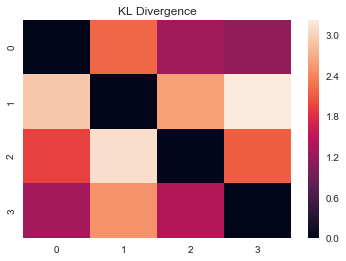

In [233]:
measure = 'KL' #"KS", "Chi2", "KS", "Wasserstein"
num_of_texts = 4 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(df[:num_of_texts].index)
corpora_sp = list(df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
print('the companies (note: year is 2000): ')
print(list(df['company'][:num_of_texts]))
print('correspond respectively to numbers: ')
print(list(df[:num_of_texts].index))
plt.title('KL Divergence')
plt.show()

the companies (note: year is 2000): 
['3M Letter ', 'Alcoa Letter ', 'American Express Letter ', 'AT&T Letter ']
correspond respectively to numbers: 
[0, 1, 2, 3]


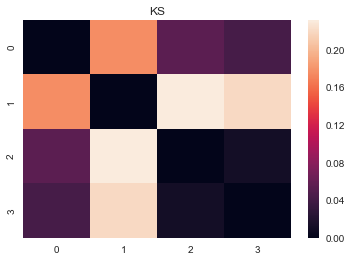

In [234]:
measure = 'KS' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 4 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(df[:num_of_texts].index)
corpora_sp = list(df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
print('the companies (note: year is 2000): ')
print(list(df['company'][:num_of_texts]))
print('correspond respectively to numbers: ')
print(list(df[:num_of_texts].index))
plt.title('KS')
plt.show()

the companies (note: year is 2000): 
['3M Letter ', 'Alcoa Letter ', 'American Express Letter ', 'AT&T Letter ']
correspond respectively to numbers: 
[0, 1, 2, 3]


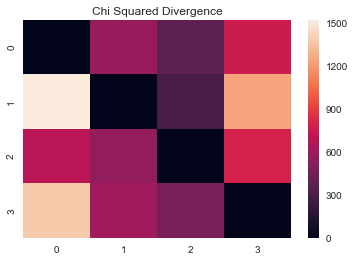

In [235]:
measure = 'Chi2' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 4 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(df[:num_of_texts].index)
corpora_sp = list(df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
print('the companies (note: year is 2000): ')
print(list(df['company'][:num_of_texts]))
print('correspond respectively to numbers: ')
print(list(df[:num_of_texts].index))
plt.title('Chi Squared Divergence')
plt.show()

the companies (note: year is 2000): 
['3M Letter ', 'Alcoa Letter ', 'American Express Letter ', 'AT&T Letter ']
correspond respectively to numbers: 
[0, 1, 2, 3]


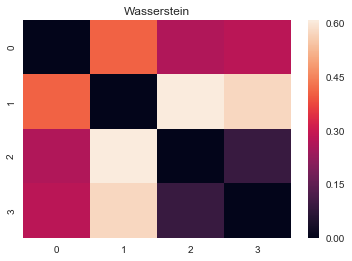

In [236]:
measure = 'Wasserstein' #"KS", "Chi2", "KS", "Wasserstein"
num_of_texts = 4 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(df[:num_of_texts].index)
corpora_sp = list(df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
print('the companies (note: year is 2000): ')
print(list(df['company'][:num_of_texts]))
print('correspond respectively to numbers: ')
print(list(df[:num_of_texts].index))
plt.title('Wasserstein')
plt.show()